# Aula 1: Introdução a modelagem de topicos

### Exemplo de uso
#### Empresa com Departamento Juridico
- Tem centenas de contratos
- Quer classificar os contratos, quais sao de compra e venda, seguro, transporte, etc
- Se tivesse contratos rotulados, seria mais facil
- Se não tivesse rotulos, poderia usar tarefas não supervisionadas do ML (agrupamento) : tras outro problema: voce nao saberia o que torna esses grupos iguais? quais sao as caracteristicas em comum
- **Outra opçao: modelagem de topicos**


---
### Modelagem de Topicos

- Cria os grupos, mas mostra quais sao as caracteristicas que o fizeram ser agrupadas
- Ainda posso limitar a quantidade de palavras a considerar



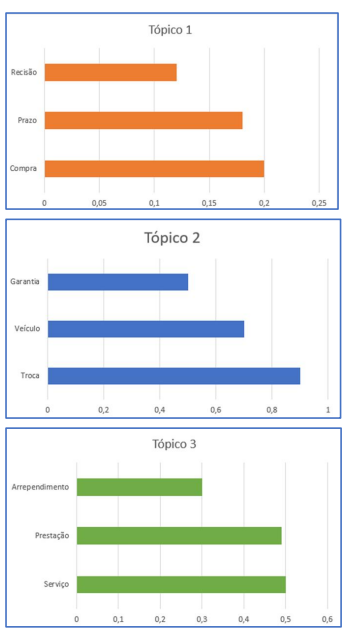

### Como implementar
- Scikit-learn:
  - Latent Dirichlet Allocation
  - Non-negative Matrix Factorization

- E se pudesse usar Transformers?? como o BERT
  - Biblioteca **BERTopic**
  - Alem de usar os modelos de transformers default, ainda pode usar outros

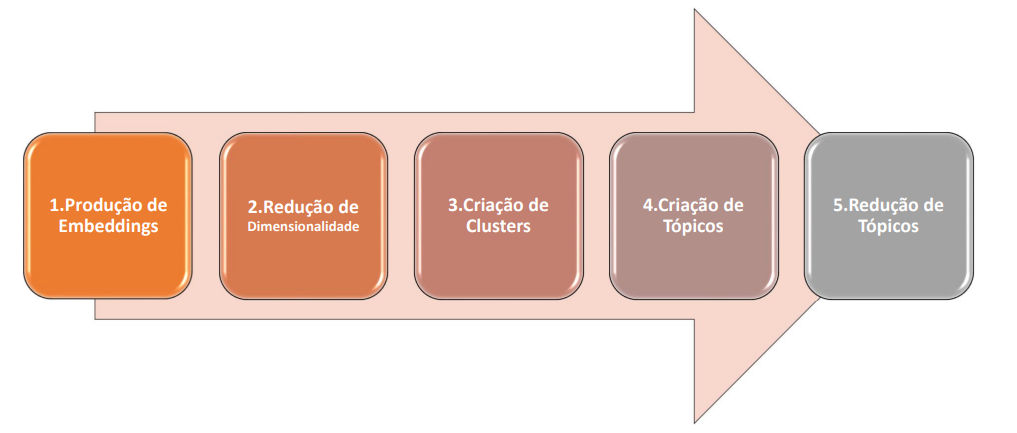

#AULA 2: Preparação do ambiente e Processamento de Dados

In [1]:
import pandas as pd

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
!pip install BERTopic
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 4.0 MB/s eta 0:00:00


In [3]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer

/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


In [4]:
# clonar meu repositorio do github

!git clone https://github.com/AnaClaraGuerra22/PLN-LLMs-e-Gen-AI---Udemy.git

import os

caminho = "/content/PLN-LLMs-e-Gen-AI---Udemy/Modelagem de Topicos/Documentos"


dados = []
for nome in sorted(os.listdir(caminho)):
    if nome.endswith(".txt"):
        with open(os.path.join(caminho, nome), "r", encoding="utf-8") as f:
            dados.append(f.read())



Cloning into 'PLN-LLMs-e-Gen-AI---Udemy'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 60 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (60/60), 3.29 MiB | 6.83 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [5]:
print(len(dados))

22


In [6]:
dados[3]

'Engenharia civil\nOrigem: Wikipédia, a enciclopédia livre.\n\nA engenharia civil molda a sociedade em que vivemos. Na foto, a cidade canadense de Toronto, com destaque para a Torre CN, uma das mais altas estruturas do mundo.\n\nA Catedral Metropolitana de Brasília e os palácios da capital federal, projetados pelo engenheiro Joaquim Cardozo com bases delgadas que apenas tocam o chão, são as principais conquistas da engenharia estrutural brasileira.\nA engenharia civil é o ramo da engenharia que planeja, projeta, executa e gerencia obras e empreendimentos. A engenharia civil transforma e adapta a natureza, com o objetivo de otimizar a qualidade de vida das pessoas.[1] Desta forma, esta área dedica-se à construção de edifícios, pontes, túneis, usinas geradoras de energia, indústrias e inúmeros outros tipos de estrutura, utilizando como ferramentas as ciências, a matemática, instrumentos, tecnologias e técnicas diversas, experiências anteriores, o cabedal normativo e as práticas locais, l

In [7]:
# BERT tem uma limitação de 512 tokens, iria truncar, pegaria so 512 palavras de cada documento
# por isso, vou transformar a lista de documentos em uma lista de sentenças

sentencas = []

for doc in dados:
    for sentenca in sent_tokenize(doc):
        sentencas.append(sentenca)

In [8]:
len(sentencas)

# sao 1504 sentenças
# sabendo que sao 22 documentos, tem, EM MEDIA, 68 sentenças em cada documento

1504

In [9]:
# exemplo
sentencas[200]

'Passou-se então, a utilizar conhecimentos científicos nesta área, de forma que as dimensões, a resistência e outros atributos de uma determinada obra podiam ser estimados.'

# Aula 3: Principais Hiper - Parametros

- topico = grupo
- gram = conjunto de palavras (gram = 1 --> 1 palavra)

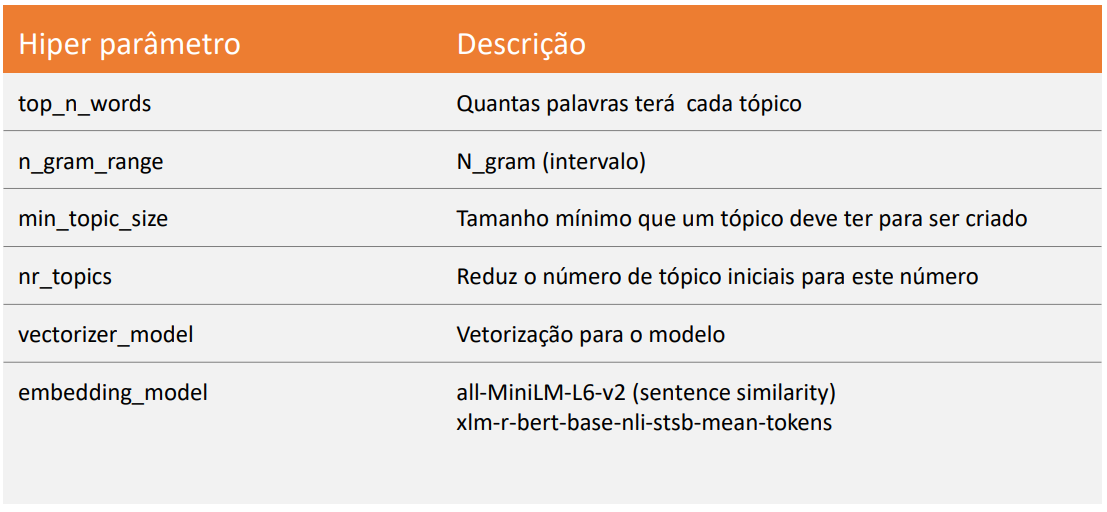

# Aula 4: Rodando o modelo

In [10]:
modelo = BERTopic(language="portuguese", top_n_words=15, min_topic_size=10, nr_topics=20,
                  vectorizer_model=CountVectorizer(ngram_range=(1,3), stop_words=stopwords.words("portuguese"), min_df=10),
                  calculate_probabilities=True, verbose=True)

In [11]:
%%time
topicos, probabilidades = modelo.fit_transform(sentencas)

2025-09-10 23:21:56,359 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/47 [00:00<?, ?it/s]

2025-09-10 23:22:55,944 - BERTopic - Embedding - Completed ✓
2025-09-10 23:22:55,945 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-09-10 23:23:05,306 - BERTopic - Dimensionality - Completed ✓
2025-09-10 23:23:05,307 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-09-10 23:23:05,423 - BERTopic - Cluster - Completed ✓
2025-09-10 23:23:05,424 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-09-10 23:23:05,544 - BERTopic - Representation - Completed ✓
2025-09-10 23:23:05,545 - BERTopic - Topic reduction - Reducing number of topics
2025-09-10 23:23:05,555 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-09-10 23:23:05,640 - BERTopic - Representation - Completed ✓
2025-09-10 23:23:05,642 - BERTopic - Topic reduction - Reduced number of topics from 33 to 20


CPU times: user 1min, sys: 1.91 s, total: 1min 2s
Wall time: 1min 9s


In [13]:
frequencia = modelo.get_topic_info()
frequencia.head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,272,-1_engenharia_além_pode_controle,"[engenharia, além, pode, controle, técnicas, d...",[Esse profissional pode se relacionar com font...
1,0,172,0_sistemas_engenharia_desenvolvimento_primeiro,"[sistemas, engenharia, desenvolvimento, primei...",[Embora os sistemas de computação possam ser u...
2,1,151,1_tempo_maior_cada_através,"[tempo, maior, cada, através, pode, formação, ...","[Para a formação da imagem em tempo real, é ne..."
3,2,132,2_primeira_estudo_ciência_podem,"[primeira, estudo, ciência, podem, vez, trabal...","[A ideia de ""balas mágicas"" foi proposta pela ..."
4,3,130,3_sistema_através_podem_outras,"[sistema, através, podem, outras, pode, cada, ...",[Os mamíferos reagem à infecção através do sis...
5,4,89,4_estruturas_sobre_grande_primeiros,"[estruturas, sobre, grande, primeiros, assim, ...","[Estes micrótomos, no entanto, forneciam corte..."
6,5,88,5_podem_diversos_qualidade_exemplo,"[podem, diversos, qualidade, exemplo, estudo, ...",[Em áreas como Medicina Nuclear e Radiodiagnós...
7,6,87,6_engenharia_formação_conhecimento_assim,"[engenharia, formação, conhecimento, assim, fo...",[[6][7]\n\nEngenharia Topográfica tem por fim ...
8,7,63,7_grandes_partir_técnicas_durante,"[grandes, partir, técnicas, durante, então, es...","[Contudo, a partir do surgimento do budismo, n..."
9,8,62,8_através_estudo_partir_podem,"[através, estudo, partir, podem, forma, pode, ...",[A mineração à superfície envolve a extração d...


In [16]:
modelo.get_topic(4)

#detalha o topico 4
# as palavras que apareceram e a probabilidade delas aparecerem

[('estruturas', np.float64(0.13017786281972168)),
 ('sobre', np.float64(0.09394275609332436)),
 ('grande', np.float64(0.07624705034006624)),
 ('primeiros', np.float64(0.0688287915872215)),
 ('assim', np.float64(0.06130742733077074)),
 ('além', np.float64(0.049656842599127185)),
 ('vários', np.float64(0.04614937990578189)),
 ('estudo', np.float64(0.045985804353641614)),
 ('diversos', np.float64(0.04529253903985345)),
 ('desenvolvimento', np.float64(0.04459064970126142)),
 ('material', np.float64(0.04252924093242963)),
 ('externas', np.float64(0.040511883194648726)),
 ('técnica', np.float64(0.03873204491698534)),
 ('principalmente', np.float64(0.03873204491698534)),
 ('técnicas', np.float64(0.03812352517003312))]

In [17]:
modelo.visualize_barchart(n_words=15, top_n_topics=10)

In [19]:
modelo.visualize_barchart(n_words=15, topics=[0,3])

#mostrar so os topicos 0 e 3

In [20]:
modelo.visualize_hierarchy(top_n_topics=15)

# mostra a relaçao entre os topicos

In [21]:
modelo.visualize_heatmap(n_clusters=15)

# Aula 5: Alterando o modelo do Transformer

In [25]:
#ANTES
# modelo = BERTopic(language="portuguese", top_n_words=15, min_topic_size=10, nr_topics=20,
#                  vectorizer_model=CountVectorizer(ngram_range=(1,3), stop_words=stopwords.words("portuguese"), min_df=10),
#                  calculate_probabilities=True, verbose=True)


modelo = BERTopic(language="portuguese", embedding_model="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2", top_n_words=15, min_topic_size=10, nr_topics=20,
                  vectorizer_model=CountVectorizer(ngram_range=(1,3), stop_words=stopwords.words("portuguese"), min_df=10),
                  calculate_probabilities=True, verbose=True)

In [26]:
%%time
topicos, probabilidades = modelo.fit_transform(sentencas)

2025-09-11 00:31:49,602 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/47 [00:00<?, ?it/s]

2025-09-11 00:32:40,550 - BERTopic - Embedding - Completed ✓
2025-09-11 00:32:40,552 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-09-11 00:32:43,670 - BERTopic - Dimensionality - Completed ✓
2025-09-11 00:32:43,672 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-09-11 00:32:43,863 - BERTopic - Cluster - Completed ✓
2025-09-11 00:32:43,866 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-09-11 00:32:43,999 - BERTopic - Representation - Completed ✓
2025-09-11 00:32:44,002 - BERTopic - Topic reduction - Reducing number of topics
2025-09-11 00:32:44,013 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-09-11 00:32:44,124 - BERTopic - Representation - Completed ✓
2025-09-11 00:32:44,128 - BERTopic - Topic reduction - Reduced number of topics from 32 to 20


CPU times: user 54.4 s, sys: 436 ms, total: 54.9 s
Wall time: 54.6 s


In [27]:
frequencia = modelo.get_topic_info()
frequencia.head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,256,-1_ainda_além_desenvolvimento_técnicas,"[ainda, além, desenvolvimento, técnicas, prime...","[E então, ainda nesse ano, durante o Primeiro ..."
1,0,230,0_engenharia_sistemas_sistema_desenvolvimento,"[engenharia, sistemas, sistema, desenvolviment...","[Embora seja o mais conhecido, o computador re..."
2,1,151,1_tempo_maior_cada_através,"[tempo, maior, cada, através, pode, formação, ...","[Para a formação da imagem em tempo real, é ne..."
3,2,132,2_estudo_ciência_vez_podem,"[estudo, ciência, vez, podem, outros, outras, ...",[[1][2][3]\n\nObjetos de estudo e aplicações\n...
4,3,132,3_sistema_através_podem_outras,"[sistema, através, podem, outras, pode, cada, ...",[Os mamíferos reagem à infecção através do sis...
5,4,100,4_engenharia_formação_forma_conhecimento,"[engenharia, formação, forma, conhecimento, as...","[Desta forma, a formação de um engenheiro civi..."
6,5,95,5_estruturas_sobre_grande_assim,"[estruturas, sobre, grande, assim, estudo, téc...",[A introdução por Ferdinand Blum em 1894 da so...
7,6,92,6_podem_qualidade_exemplo_ainda,"[podem, qualidade, exemplo, ainda, estudo, out...","[Por exemplo, para esse propósito, Ac mo radio..."
8,7,62,7_através_estudo_partir_podem,"[através, estudo, partir, podem, forma, pode, ...",[Foram descobertas antigas minas de sílex nas ...
9,8,40,8_produção_conhecimento_grande_bem,"[produção, conhecimento, grande, bem, conhecim...",[Na constante metamorfose da realidade mundial...


In [28]:
modelo.get_topic(4)

[('engenharia', np.float64(0.07677615202545449)),
 ('formação', np.float64(0.07161344742312718)),
 ('forma', np.float64(0.060990539677155994)),
 ('conhecimento', np.float64(0.05775461904091557)),
 ('assim', np.float64(0.055333918520627204)),
 ('além', np.float64(0.05005574108881775)),
 ('sistemas', np.float64(0.046017114787664355)),
 ('conhecimentos', np.float64(0.043580853449239586)),
 ('grandes', np.float64(0.03255156701051236)),
 ('desde', np.float64(0.03240794596242194)),
 ('bem', np.float64(0.0317837741449117)),
 ('ainda', np.float64(0.02996874166409243)),
 ('outras', np.float64(0.029552010203042184)),
 ('técnica', np.float64(0.026436514251178087)),
 ('especialmente', np.float64(0.025860242263639373))]

In [29]:
modelo.visualize_heatmap(n_clusters=15)